# Viya application: binary classifcation for imbalanced NLB data

In [ ]:
import pandas as pd

In [ ]:
train_numeric = pd.read_csv('C:/NLB/train_numeric.csv')

In [ ]:
train_numeric.head()

In [ ]:
row0=train_numeric.ix[0,:]
row0=row0.fillna(0)
train_numeric.ix[0,:]=row0

In [ ]:
row0=train_numeric.ix[0,:]
row0

In [ ]:
countn = 0
for i in row0:
    if i is None:
        countn=countn+1
print(countn)

In [ ]:
train_numeric=train_numeric.fillna(0)

In [ ]:
train_numeric['L3_S47_F4163'].dtypes

In [ ]:
s.upload(train_numeric,casout=table("train_numeric",replace = True))

In [ ]:
s.promote("train_numeric")

In [ ]:
test_numeric = pd.read_csv('C:/NLB/test_numeric.csv')

In [ ]:
row0=test_numeric.ix[0,:]
row0=row0.fillna(0)
test_numeric.ix[0,:]=row0

In [ ]:
s.upload(test_numeric,casout=table("test_numeric",replace = True))

In [ ]:
s.promote('test_numeric')

In [ ]:
s.fetch('test_numeric', to=3)

In [ ]:
s.upload?

In [ ]:
s.fetch('train_numeric',to=3)

In [ ]:
s.promote('train_numeric')

In [ ]:
s.columninfo('train_numeric')

In [ ]:
s.runCode("data train_numeric;\
           set train_numeric;\
           L3_S47_F4163_N = input(L3_S47_F4163, 8.);\
           drop L3_S47_F4163;\
           rename L3_S47_F4163_N = L3_S47_F4163;\
           run;")

In [ ]:
s.fetch('train_numeric', to=3)

In [ ]:
s.columninfo(table=table('train_numeric', vars='L3_S47_F4163'))

## 1. Import packages

In [1]:
## visualization setting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

## import third party python data framework
import pandas as pd 
import numpy as np 

## ignore warning
import warnings
warnings.filterwarnings('ignore')

##import time
import time

## python CAS client library
from swat_pipeline import *

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## 2. Connect to CAS server

In [2]:
## set portnumber and it will use multiple sessions in cross validation
portnumber = 14297
s= CAS('snap001.unx.sas.com', portnumber, 'lidong',nworkers=10)
s.setSessOpt(caslib='CASUSER', locale='en_US')

NOTE: 'CASUSER(lidong)' is now the active caslib.


+ Elapsed: 0.0126s, user: 0.018s, sys: 0.017s, mem: 0.827mb

## 3. Load the action sets

In [3]:
s.loadactionset('simple')         ## extract features  
s.loadactionset('dataStep')       ## create 5-fold cross-validation data sets for tuning paramters
s.loadactionset('fedsql')         ## sql operation on CAS Table
s.loadactionset('decisionTree')   ## train tree model

NOTE: Added action set 'simple'.
NOTE: Added action set 'dataStep'.
NOTE: Added action set 'fedsql'.
NOTE: Added action set 'decisionTree'.


[actionset]

 'decisionTree'

+ Elapsed: 0.00574s, user: 0.008s, sys: 0.022s, mem: 0.371mb

## 4. Load data from HDFS into CAS

In [18]:
## train=pd.read_csv("C:/NLB/NLB_train_tab_h.txt",sep='\t',decimal=',')
## s.upload(data=train,casout=table('df_trainTable',replace=True))
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'trainnumeric'},caslib='HPS',
                  path='train_numeric_bosch.sashdat')


NOTE: Cloud Analytic Services made the HDFS file train_numeric_bosch.sashdat available as table TRAINNUMERIC in caslib CASUSER(lidong).


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TRAINNUMERIC'

[casTable]

 CASTable('TRAINNUMERIC', caslib='CASUSER(lidong)')

+ Elapsed: 3.81s, user: 0.181s, sys: 0.18s, mem: 9.15mb

In [84]:
trainnumeric = s.CASTable('trainnumeric')
trainnumeric.summary()

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT
0,Id,4.000,2367495.000,1183747.0,0.0,1.184050e+06,1.401615e+12,683434.767725,6.281562e+02,4.670831e+11,2.212490e+18,5.529077e+17,5.772011e+01,1884.960808,0.000000e+00
1,L0_S0_F0,-0.565,0.278,673862.0,509885.0,5.456013e-05,3.676600e+01,0.080214,9.771629e-05,6.434354e-03,4.335862e+03,4.335860e+03,1.470202e+05,0.558352,5.766039e-01
2,L0_S0_F2,-0.616,0.302,673862.0,509885.0,9.128575e-05,6.151400e+01,0.092799,1.130466e-04,8.611642e-03,5.803055e+03,5.803049e+03,1.016576e+05,0.807506,4.193756e-01
3,L0_S0_F4,-0.415,0.585,673862.0,509885.0,4.005271e-05,2.699000e+01,0.211520,2.576708e-04,4.474055e-02,3.014892e+04,3.014891e+04,5.281031e+05,0.155441,8.764734e-01
4,L0_S0_F6,-0.416,0.584,673862.0,509885.0,1.383518e-05,9.323000e+00,0.211635,2.578115e-04,4.478942e-02,3.018184e+04,3.018184e+04,1.529689e+06,0.053664,9.572029e-01
5,L0_S0_F8,-0.447,0.466,673862.0,509885.0,-1.256667e-04,-8.468200e+01,0.094555,1.151860e-04,8.940675e-03,6.024783e+03,6.024772e+03,-7.524281e+04,-1.090989,2.752780e-01
6,L0_S0_F10,-0.612,0.388,673862.0,509885.0,1.613283e-04,1.087130e+02,0.164469,2.003540e-04,2.704998e-02,1.822794e+04,1.822792e+04,1.019466e+05,0.805216,4.206952e-01
7,L0_S0_F12,-0.052,0.948,673862.0,509885.0,-4.411734e-05,-2.972900e+01,0.019451,2.369479e-05,3.783352e-04,2.549466e+02,2.549453e+02,-4.408888e+04,-1.861900,6.261756e-02
8,L0_S0_F14,-0.272,0.688,673862.0,509885.0,-3.591596e-04,-2.420240e+02,0.104133,1.268541e-04,1.084376e-02,7.307274e+03,7.307187e+03,-2.899362e+04,-2.831281,4.636332e-03
9,L0_S0_F16,-0.500,0.500,673862.0,509885.0,6.722445e-07,4.530000e-01,0.114829,1.398836e-04,1.318574e-02,8.885353e+03,8.885353e+03,1.708146e+07,0.004806,9.961656e-01


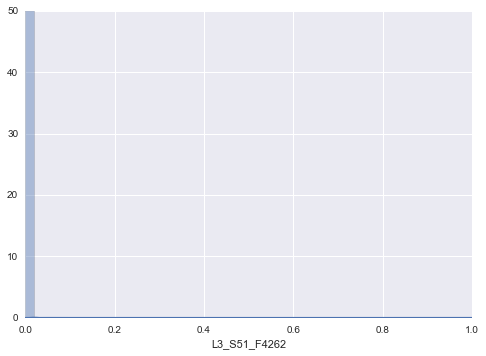

In [85]:
import pandas as pd
x = trainnumeric['L3_S51_F4262'].to_series()
sns.distplot(x.dropna())

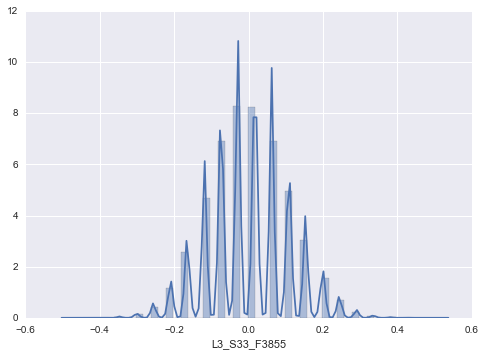

In [86]:
x = trainnumeric['L3_S33_F3855'].to_series()
sns.distplot(x.dropna())

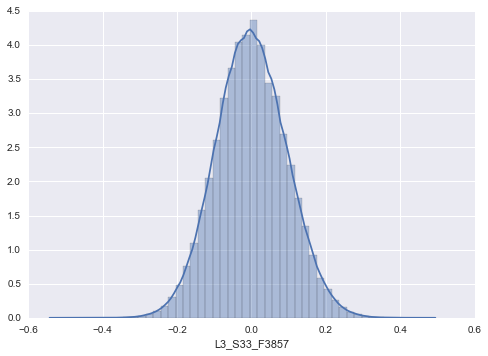

In [87]:
x = trainnumeric['L3_S33_F3857'].to_series()
sns.distplot(x.dropna())

In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'traincategorical'},caslib='HPS',
                  path='traincategorical.sashdat')

In [ ]:
traincategorical = s.CASTable('traincategorical')
traincategorical.head()

In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'traindate'},caslib='HPS',
                  path='traindate.sashdat')

In [ ]:
traindate = s.CASTable('traindate')
traindate.head()

In [ ]:
traindate.shape

## Load test data

In [20]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'testnumeric'},caslib='HPS',
                  path='test_numeric_bosch.sashdat')

NOTE: Cloud Analytic Services made the HDFS file test_numeric_bosch.sashdat available as table TESTNUMERIC in caslib CASUSER(lidong).


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TESTNUMERIC'

[casTable]

 CASTable('TESTNUMERIC', caslib='CASUSER(lidong)')

+ Elapsed: 3.78s, user: 0.174s, sys: 0.184s, mem: 9.15mb

In [21]:
s.fetch('testnumeric',to=3)

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
0,1826596.0,-0.036,-0.034,0.294,0.294,-0.143,-0.021,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1826598.0,-0.062,-0.064,-0.179,-0.179,-0.013,0.116,0.000,0.008,0.076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1826599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'testcategorical'},caslib='HPS',
                  path='testcategorical.sashdat')

In [ ]:
s.fetch('testcategorical',to=3)

In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'testdate'},caslib='HPS',
                  path='testdate.sashdat')

In [ ]:
s.fetch('testdate',to=3)

## Merge Test table

In [22]:
## s.upload(data=train,casout=table('df_trainTable',replace=True))
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'train_test'},caslib='HPS',
                  path='trainTestIdInfor.sashdat')

NOTE: Cloud Analytic Services made the HDFS file trainTestIdInfor.sashdat available as table TRAIN_TEST in caslib CASUSER(lidong).


[caslib]

 'CASUSER(lidong)'

[tableName]

 'TRAIN_TEST'

[casTable]

 CASTable('TRAIN_TEST', caslib='CASUSER(lidong)')

+ Elapsed: 7.31s, user: 0.286s, sys: 0.528s, mem: 1.81mb

In [7]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.*, t3.*\
               from trainnumeric as t1, traincategorical as t2, traindate as t3\
               where t1.Id = t2.Id and t2.Id = t3.Id'

boschTrain = s.CASTable('boschTrain',replace=True)

s.execDirect(casOut=boschTrain, query=querystr)

ERROR: Table "TRAINCATEGORICAL" does not exist or cannot be accessed
ERROR: The action stopped due to errors.


+ Elapsed: 0.0486s, user: 0.199s, sys: 0.081s, mem: 1.07mb

In [ ]:
boschTrain.shape

In [8]:
s.runCode("data boschTrain;\
            set boschTrain;\
            drop Id_2;\
            drop Id_3;\
          run;")

ERROR: The table boschTrain in caslib CASUSER(lidong) does not exist.
ERROR: The table boschTrain in caslib CASUSER(lidong) must have at least one variable.
ERROR: The action stopped due to errors.


+ Elapsed: 0.0455s, user: 0.154s, sys: 0.332s, mem: 407mb

In [9]:
boschTrain = s.CASTable('boschTrain',replace=True)

In [10]:
boschTrain.head()

ERROR: The file or path 'boschTrain' is not available in the file system.
ERROR: Table 'boschTrain' could not be loaded.
ERROR: Failure opening table 'boschTrain': A table could not be loaded.
ERROR: The action stopped due to errors.


SWATError: A table could not be loaded.

In [ ]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.*, t3.*\
               from testnumeric as t1, testcategorical as t2, testdate as t3\
               where t1.Id = t2.Id and t2.Id = t3.Id'

boschTest = s.CASTable('boschTest',replace=True)

s.execDirect(casOut=boschTest, query=querystr)

In [ ]:
boschTest.shape

In [ ]:
s.runCode("data boschTest;\
            set boschTest;\
            drop Id_2;\
            drop Id_3;\
          run;")

In [ ]:
boschTest = s.CASTable('boschTest',replace=True)

In [ ]:
boschTest.head()

## Drop table

In [ ]:
s.droptable('trainnumeric')
s.droptable('traincategorical')
s.droptable('traindate')



In [ ]:
s.droptable('testnumeric')
s.droptable('testcategorical')
s.droptable('testdate')


In [ ]:
s.droptable('boschTest')

## Merge train Table with train-test data

In [23]:
trainnumeric = s.CASTable('trainnumeric')
trainnumeric.shape

(1183747, 970)

In [24]:
testnumeric = s.CASTable('testnumeric')
testnumeric.shape

(1183748, 969)

(1183747, 970)

(1183748, 969)

In [25]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.* from trainnumeric as t1 left join \
            train_test as t2 on t1.Id = t2.Id'

boschTrain = s.CASTable('boschTrain',replace=True)

s.execDirect(casOut=boschTrain, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table boschTrain instead.
NOTE: Column Response already exists. Column Response_2 has been created in table boschTrain instead.
NOTE: Table boschTrain was created in caslib CASUSER(lidong) with 1183747 rows returned.


+ Elapsed: 11.4s, user: 278s, sys: 94s, mem: 7.86e+03mb

In [26]:
boschTrain.shape

(1183747, 978)

In [27]:
##SQL merge two CAS tables: trainCASTable and despCASTable
querystr = 'select t1.*, t2.* from testnumeric as t1 left join \
             train_test as t2 on t1.Id = t2.Id'

boschTest = s.CASTable('boschTest',replace=True)

s.execDirect(casOut=boschTest, query=querystr)

NOTE: Column Id already exists. Column Id_2 has been created in table boschTest instead.
NOTE: Table boschTest was created in caslib CASUSER(lidong) with 1183748 rows returned.


+ Elapsed: 18.2s, user: 276s, sys: 93.2s, mem: 7.83e+03mb

In [28]:
boschTest.shape

(1183748, 977)

In [17]:
s.runCode("""
        data boschTrain;
        set boschTrain;
        array change _numeric_;
        do over change;
            if change=. then change=0;
        end;
        """)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,978,"CASTable('boschTrain', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,978,"CASTable('boschTrain', caslib='CASUSER(lidong)')"


In [18]:
s.runCode("""
        data boschTest;
        set boschTest;
        array change _numeric_;
        do over change;
            if change=. then change=0;
        end;
        """)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,977,"CASTable('boschTest', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,977,"CASTable('boschTest', caslib='CASUSER(lidong)')"


In [29]:
s.runCode("data boschTrain;\
           set boschTrain;\
           drop Id_2;\
           drop Response_2;\
           run;")

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,978,"CASTable('boschTrain', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,976,"CASTable('boschTrain', caslib='CASUSER(lidong)')"


In [30]:
s.runCode("data boschTest;\
           set boschTest;\
           drop Id_2;\
           drop Response_2;\
           run;")

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,977,"CASTable('boschTest', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,976,"CASTable('boschTest', caslib='CASUSER(lidong)')"


In [31]:
s.runCode("data boschTest;\
           set boschTest;\
           drop Response;\
           run;")

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,976,"CASTable('boschTest', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTest,1183748,975,"CASTable('boschTest', caslib='CASUSER(lidong)')"


In [32]:
s.summary('boschTrain')

,Column,Min,Max,N,NMiss,Mean,Sum,Std,StdErr,Var,USS,CSS,CV,TValue,ProbT
0,Id,4.000,2367495.000,1183747.0,0.0,1.184050e+06,1.401615e+12,683434.767725,628.156160,4.670831e+11,2.212490e+18,5.529077e+17,5.772011e+01,1884.960808,0.000000e+00
1,L0_S0_F0,-0.565,0.278,673862.0,509885.0,5.456013e-05,3.676600e+01,0.080214,0.000098,6.434354e-03,4.335862e+03,4.335860e+03,1.470202e+05,0.558352,5.766039e-01
2,L0_S0_F2,-0.616,0.302,673862.0,509885.0,9.128575e-05,6.151400e+01,0.092799,0.000113,8.611642e-03,5.803055e+03,5.803049e+03,1.016576e+05,0.807506,4.193756e-01
3,L0_S0_F4,-0.415,0.585,673862.0,509885.0,4.005271e-05,2.699000e+01,0.211520,0.000258,4.474055e-02,3.014892e+04,3.014891e+04,5.281031e+05,0.155441,8.764734e-01
4,L0_S0_F6,-0.416,0.584,673862.0,509885.0,1.383518e-05,9.323000e+00,0.211635,0.000258,4.478942e-02,3.018184e+04,3.018184e+04,1.529689e+06,0.053664,9.572029e-01
5,L0_S0_F8,-0.447,0.466,673862.0,509885.0,-1.256667e-04,-8.468200e+01,0.094555,0.000115,8.940675e-03,6.024783e+03,6.024772e+03,-7.524281e+04,-1.090989,2.752780e-01
6,L0_S0_F10,-0.612,0.388,673862.0,509885.0,1.613283e-04,1.087130e+02,0.164469,0.000200,2.704998e-02,1.822794e+04,1.822792e+04,1.019466e+05,0.805216,4.206952e-01
7,L0_S0_F12,-0.052,0.948,673862.0,509885.0,-4.411734e-05,-2.972900e+01,0.019451,0.000024,3.783352e-04,2.549466e+02,2.549453e+02,-4.408888e+04,-1.861900,6.261756e-02
8,L0_S0_F14,-0.272,0.688,673862.0,509885.0,-3.591596e-04,-2.420240e+02,0.104133,0.000127,1.084376e-02,7.307274e+03,7.307187e+03,-2.899362e+04,-2.831281,4.636332e-03
9,L0_S0_F16,-0.500,0.500,673862.0,509885.0,6.722445e-07,4.530000e-01,0.114829,0.000140,1.318574e-02,8.885353e+03,8.885353e+03,1.708146e+07,0.004806,9.961656e-01


In [33]:
s.runCode("data boschTrainP boschTrainN;\
           set boschTrain;\
           if Response=0.0 then output boschTrainP;\
           if Response=1.0 then output boschTrainN;\
           run;")

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrain,1183747,976,"CASTable('boschTrain', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrainP,1176868,976,"CASTable('boschTrainP', caslib='CASUSER(lidong)')"
1,CASUSER(lidong),boschTrainN,6879,976,"CASTable('boschTrainN', caslib='CASUSER(lidong)')"


In [34]:
s.runCode(code="""data boschTrainP1 boschTrainP2;
                set boschTrainP;
                myrank = _rankid_*1000+_threadid_;
                call streaminit(myrank);
                trainFlag = rand('uniform')<0.85;
                if(trainFlag) then output boschTrainP1;
                else output boschTrainP2;  
                run;
                """)

s.runCode(code="""data boschTrainN1 boschTrainN2;
                set boschTrainN;
                myrank = _rankid_*1000+_threadid_;
                call streaminit(myrank);
                trainFlag = rand('uniform')<0.85;
                if(trainFlag) then output boschTrainN1;
                else output boschTrainN2;  
                """)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrainN,6879,976,"CASTable('boschTrainN', caslib='CASUSER(lidong)')"
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrainN1,5814,978,"CASTable('boschTrainN1', caslib='CASUSER(lidon..."
1,CASUSER(lidong),boschTrainN2,1065,978,"CASTable('boschTrainN2', caslib='CASUSER(lidon..."


In [35]:
s.runCode(code="""data train;
                set boschTrainP1 boschTrainN1;
               """)

s.runCode(code="""data test;
                set boschTrainP2 boschTrainN2;
               """)

,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),boschTrainP2,176761,978,"CASTable('boschTrainP2', caslib='CASUSER(lidon..."
1,CASUSER(lidong),boschTrainN2,1065,978,"CASTable('boschTrainN2', caslib='CASUSER(lidon..."
,casLib,Name,Rows,Columns,casTable
0,CASUSER(lidong),test,177826,978,"CASTable('test', caslib='CASUSER(lidong)')"


In [36]:
train = s.CASTable("train")
test = s.CASTable("test")
train.shape

(1005921, 978)

In [37]:
s.promote("train")
s.promote("test")

+ Elapsed: 0.0266s, user: 0.029s, sys: 0.128s, mem: 1.5mb

In [38]:
test.shape

(177826, 978)

## Train

In [52]:
allVars = train.columns.values
removeVars = ['Id', 'index', 'myrank', 'trainFlag']
inputVarsc = [x for x in allVars if x not in removeVars]

In [53]:
train.shape

(1005921, 978)

In [41]:
nomifeature = 'Response'

In [43]:
cas_param_grid = {
    'nTree': [200,300],
    'learningRate': [0.05,0.1],   
    'maxlevel': [9],
    'samplingRate':[0.6],
    'm':[100],
    'leafSize':[20],
    'seed':[2016],
    'target':['Response'], 
    'inputs':[inputVarsc],
    'nominals':['Response']
}

In [44]:
gridsearch = GridSearchCV(estimator=GBTree(), param_grid=cas_param_grid, 
                          scoring='MCC', n_jobs=4, cv=1)

In [45]:
res = gridsearch.fitTrainTest(train,test, True, hostname ='snap001.unx.sas.com', \
                     port = 14297, username = 'lidong')

In [46]:
print(res.best_score_)

0.20586219955431956


In [47]:
print(res.best_params_)

{'m': 100, 'learningRate': 0.05, 'inputs': ['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8', 'L0_S0_F10', 'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16', 'L0_S0_F18', 'L0_S0_F20', 'L0_S0_F22', 'L0_S1_F24', 'L0_S1_F28', 'L0_S2_F32', 'L0_S2_F36', 'L0_S2_F40', 'L0_S2_F44', 'L0_S2_F48', 'L0_S2_F52', 'L0_S2_F56', 'L0_S2_F60', 'L0_S2_F64', 'L0_S3_F68', 'L0_S3_F72', 'L0_S3_F76', 'L0_S3_F80', 'L0_S3_F84', 'L0_S3_F88', 'L0_S3_F92', 'L0_S3_F96', 'L0_S3_F100', 'L0_S4_F104', 'L0_S4_F109', 'L0_S5_F114', 'L0_S5_F116', 'L0_S6_F118', 'L0_S6_F122', 'L0_S6_F132', 'L0_S7_F136', 'L0_S7_F138', 'L0_S7_F142', 'L0_S8_F144', 'L0_S8_F146', 'L0_S8_F149', 'L0_S9_F155', 'L0_S9_F160', 'L0_S9_F165', 'L0_S9_F170', 'L0_S9_F175', 'L0_S9_F180', 'L0_S9_F185', 'L0_S9_F190', 'L0_S9_F195', 'L0_S9_F200', 'L0_S9_F205', 'L0_S9_F210', 'L0_S10_F219', 'L0_S10_F224', 'L0_S10_F229', 'L0_S10_F234', 'L0_S10_F239', 'L0_S10_F244', 'L0_S10_F249', 'L0_S10_F254', 'L0_S10_F259', 'L0_S10_F264', 'L0_S10_F269', 'L0_S10_F274', 'L0_S11_F282',

In [42]:
for i in range(len(res.grid_scores_)):
    print(res.grid_scores_[i][1])

0.17747310710211436
0.1881121904990273
0.14307194357227004
0.16212156852240805


In [54]:
import time
start=time.time()
trainResult=s.gbtreetrain(    table    = 'boschTrain',
                              inputs   = inputVarsc,
                              nominals = nomifeature,
                              target   = 'Response',
                              maxlevel = 9,
                              leafsize = 20,
                              ntree    = 200,
                              learningRate = 0.05,
                              m        = 100,
                              samplingRate = 0.6,
                              lasso    = 0,
                              ridge    = 0,
                              varimp   = 1,
                              seed     = 2016,
                              casout   = {'name': "currentmodelgbt", 'replace':1})

endt=time.time()
print((endt-start)/60) 

3.707470707098643


In [55]:
s.fetch('currentmodelgbt', to=3)

,_Target_,_NumTargetLevel_,_NodeID_,_TreeLevel_,_NodeName_,_Parent_,_ParentName_,_NodeType_,_Gain_,_NumObs_,...,_TargetMean_,_NumChild_,_ChildID0_,_ChildID1_,_PBranches_,_PBLower0_,_PBLower1_,_PBUpper0_,_PBUpper1_,_TreeID_
0,Response,2.0,0.0,0.0,L3_S29_F3470,-1.0,,2.0,108.768616,710243.0,...,0.0,2.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0
1,Response,2.0,10.0,3.0,L3_S30_F3669,4.0,L3_S33_F3855,2.0,533.749698,2002.0,...,0.0,2.0,19.0,20.0,1.0,-0.483,NaN,-0.4330,NaN,0.0
2,Response,2.0,20.0,4.0,L3_S29_F3357,10.0,L3_S30_F3669,2.0,73.422779,1303.0,...,0.0,2.0,37.0,38.0,1.0,-0.275,NaN,-0.1499,NaN,0.0


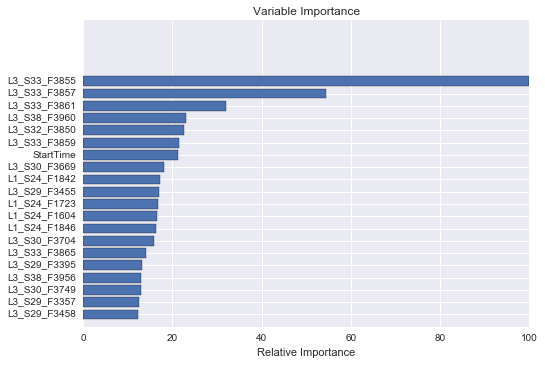

In [56]:
ImpVariableData = trainResult.DTreeVarImpInfo
# Plot feature importance
feature_importance = ImpVariableData['Importance'].head(20)
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 1
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ImpVariableData['Variable'][sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
# L3_S33_F3857

## Test

In [ ]:
import time
start=time.time()
res=s.gbtreescore(table='test',
                    model ='currentmodelgbt',
                    copyVars={"Id","Response"},    
                    encodeName=True,
                    casout={'name':'resultPredict2','replace':1}
                 ) 

              
endt=time.time()
print((endt-start)/60)

In [ ]:
# The plot shows the relationship between test error and the number of trees
ntree = 500
x = np.arange(ntree)
plt.plot(x, res.ErrorMetricInfo["MCR"])
plt.legend(['Test Error'], loc='upper left')
plt.ylabel('MCR')
plt.xlabel('Number of trees')



In [ ]:


out =s.assess(
    table(
        name='resultPredict2'
    ),                                                   # input #
   
    inputs="P_Response1", 
    response = 'Response',
    cutstep =0.01,
    casOut=table("casoutt",replace=True),
    rocout = table('rosout',replace=True),
    event='1'
)

rosout = s.CASTable('rosout')
rosdataframe = rosout.head(100)
rosdataframe.head(5)

import math
step= 5
TP = float(rosdataframe.ix[step, '_TP_'])
FP = float(rosdataframe.ix[step, '_FP_'])
FN = float(rosdataframe.ix[step, '_FN_'])
TN = float(rosdataframe.ix[step, '_TN_'])
print(TP,FP,FN,TN)
sumup=TP*TN-FP*FN
sumdown=(TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)*1.0
print("MCC: ",sumup/math.sqrt(sumdown))

In [57]:
s.fetch('currentmodelgbt',to=3)

,_Target_,_NumTargetLevel_,_NodeID_,_TreeLevel_,_NodeName_,_Parent_,_ParentName_,_NodeType_,_Gain_,_NumObs_,...,_TargetMean_,_NumChild_,_ChildID0_,_ChildID1_,_PBranches_,_PBLower0_,_PBLower1_,_PBUpper0_,_PBUpper1_,_TreeID_
0,Response,2.0,0.0,0.0,L3_S29_F3470,-1.0,,2.0,108.768616,710243.0,...,0.0,2.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,0.0
1,Response,2.0,10.0,3.0,L3_S30_F3669,4.0,L3_S33_F3855,2.0,533.749698,2002.0,...,0.0,2.0,19.0,20.0,1.0,-0.483,NaN,-0.4330,NaN,0.0
2,Response,2.0,20.0,4.0,L3_S29_F3357,10.0,L3_S30_F3669,2.0,73.422779,1303.0,...,0.0,2.0,37.0,38.0,1.0,-0.275,NaN,-0.1499,NaN,0.0


In [58]:
import time
start=time.time()
res=s.gbtreescore(table = 'boschTest',
                  model = 'currentmodelgbt',
                  copyVars= {"Id"},    
                  encodeName=True,
                  casout = {'name':'resultPredict','replace':1}
                 ) 
            
endt=time.time()
print((endt-start)/60)

0.07912458181381225


In [59]:
resultPredict = s.CASTable('resultPredict')
resultPredict.shape

(1183748, 5)

In [60]:
resultPredict.head()

,Id,I_Response,_MissIt_,P_Response1,P_Response0
0,984871.0,0,NaN,0.001611,0.998389
1,984872.0,0,NaN,0.002154,0.997846
2,984873.0,0,NaN,0.003291,0.996709
3,984875.0,0,NaN,0.004120,0.995880
4,984877.0,0,NaN,0.002088,0.997912


In [67]:
resultPredictF = resultPredict[['Id','P_Response1']].to_frame()

In [68]:
resultPredictF.shape

(1183748, 2)

In [69]:
resultPredictF.head()

,Id,P_Response1
0,984871.0,0.001611
1,984872.0,0.002154
2,984873.0,0.003291
3,984875.0,0.004120
4,984877.0,0.002088


In [70]:
def functionx(x):
    if(float(x)<0.1):
        return 0
    else:
        return 1

In [71]:
resultPredictF['Response']=resultPredictF['P_Response1'].apply(functionx)

In [72]:
resultPredictF.head()

,Id,P_Response1,Response
0,984871.0,0.001611,0
1,984872.0,0.002154,0
2,984873.0,0.003291,0
3,984875.0,0.004120,0
4,984877.0,0.002088,0


In [74]:
resultPredictDF = resultPredictF[['Id','Response']].head(1183750)

In [75]:
resultPredictDF = pd.DataFrame(resultPredictDF)
resultPredictDF.shape

(1183748, 2)

In [76]:
resultPredictDF.columns = ['Id', 'Response']

In [77]:
resultPredictDF

,Id,Response
0,984871.0,0
1,984872.0,0
2,984873.0,0
3,984875.0,0
4,984877.0,0
5,984879.0,0
6,984887.0,0
7,984888.0,0
8,984889.0,0
9,984890.0,0


In [78]:
resultPredictDF.Id = resultPredictDF.Id.astype(int)

In [79]:
resultPredictDF.Response = resultPredictDF.Response.astype(float)

In [80]:
resultPredictDF.Response = resultPredictDF.Response.astype(int)

In [81]:
resultPredictDF.head()

,Id,Response
0,984871,0
1,984872,0
2,984873,0
3,984875,0
4,984877,0


In [82]:
resultPredictDF.to_csv('bosch_submit.csv', index=False)

In [83]:
result = pd.read_csv('bosch_submit.csv')
result.shape

(1183748, 2)

In [ ]:
def functionx(x):
    if(float(x)<0.5):
        return 0
    else:
        return 1

In [ ]:
resultPredictDF['Response'].apply(functionx)

In [ ]:
s.droptable('resultPredict')

In [ ]:
s.fetch('resultPredict')

In [ ]:
res.ScoreInfo

In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'testcategorical'},caslib='HPS',
                  path='traincategorical.sashdat')

In [ ]:
s.table.loadtable(casout={'caslib':'CASUSER(lidong)','name':'testdate'},caslib='HPS',
                  path='traindate.sashdat')